# Random CartPole evaluation (baseline)

## Code to reset matplotlib plotting to defaults

In [27]:
# Checking matplotlib defaults
# inline_default_rc = dict(mpl.rcParams)
# default_rc = dict(mpl.rcParamsDefault)
# print( {k:[v,default_rc[k]] for k,v in inline_default_rc.items() if v != default_rc[k]} )

# mpl.rcParams.update(mpl.rcParamsDefault)


In [1]:
import gym
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")
from tqdm import tqdm

In [2]:
from utils import stringify_dict

In [3]:
ENV_NAME = "CartPole-v1"
NUM_EPISODES = 100000

env = gym.make(ENV_NAME)
env.seed(0)
total_reward_all_episodes = []

HYPERPARAMETERS = {"random": "random"}

In [4]:
# For saving results
from datetime import datetime
import os

dt_now = datetime.now()
dt_str = dt_now.strftime("%Y%m%d-%H%M%S")

RESULTS_PATH = "results"
EXP_TYPE = "train-random"
HYPERPARAMETERS_STR = stringify_dict(HYPERPARAMETERS)
FILE_NAME = f"{dt_str}_{EXP_TYPE}_{HYPERPARAMETERS_STR}"
LOG_FILE_NAME = FILE_NAME + ".log"
PLOT_FILE_NAME = FILE_NAME + ".png"
OUTPUT_PATH = os.path.join(RESULTS_PATH, ENV_NAME, EXP_TYPE, dt_str)
OUTPUT_PATH

if not os.path.isdir(OUTPUT_PATH):
    os.makedirs(OUTPUT_PATH)
    

In [10]:
WALL_TIME = %%time -o

episode_counter = 0
for _ in tqdm(range(NUM_EPISODES)):
    total_reward = 0.0
    episode_counter+= 1
    obs = env.reset()

    while True:
        action = env.action_space.sample()
        observation, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break

    if (episode_counter % 1000 == 0):
        total_reward_all_episodes.append(total_reward)

env.close()

SyntaxError: invalid syntax (<ipython-input-10-ffac14433893>, line 1)

In [6]:
results_df = pd.DataFrame.from_dict({"total_rewards": total_reward_all_episodes})
results_df["episode_id"] = results_df.index
results_df.head(5)

,total_rewards,episode_id
0,63.0,0
1,25.0,1
2,11.0,2
3,55.0,3
4,22.0,4


## Plot and save results

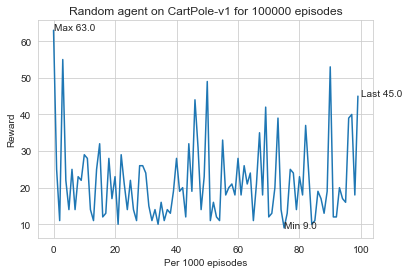

In [7]:
plt.plot(results_df["episode_id"], results_df["total_rewards"]);

plt.title(f"Random agent on {ENV_NAME} for {NUM_EPISODES} episodes");
plt.xlabel("Per 1000 episodes");
plt.ylabel("Reward");

last_reward = (100, results_df["total_rewards"].iloc[-1])
max_reward = (results_df["total_rewards"].idxmax(), results_df["total_rewards"].max())
min_reward = (results_df["total_rewards"].idxmin(), results_df["total_rewards"].min())

plt.annotate(f"Last {last_reward[1]}", (last_reward[0], last_reward[1]))
plt.annotate(f"Min {min_reward[1]}", (min_reward[0], min_reward[1]))
plt.annotate(f"Max {max_reward[1]}", (max_reward[0], max_reward[1]))

plt.savefig(os.path.join(OUTPUT_PATH, PLOT_FILE_NAME), dpi=300, bbox_inches="tight")
plt.show()

In [8]:
from collections import namedtuple

Results = namedtuple("Results", "min_reward, max_reward, reward_variance, mean_reward")

results = Results(min(results_df.total_rewards), max(results_df.total_rewards), np.std(results_df.total_rewards), np.mean(results_df.total_rewards))

with open(os.path.join(OUTPUT_PATH, LOG_FILE_NAME), "w") as f:
    f.write(dt_str + "\n")
    f.write(HYPERPARAMETERS_STR + "\n")
    f.write(stringify_dict(results._asdict()))
